# Linear Regression

### Model Use: 
- Fitting, 
- interpreting coefficients, 
- R².
### Diagnostics: 
- Residuals, 
- multicollinearity, 
- outliers.
### Extensions: 
- Transformations, 
- high dimensions, 
- regularisation.
### Practical Tips: 
- Encoding, 
- scaling, 
- prediction intervals.
### Pitfalls & Limitations: 
- When to switch models.

In linear regression, we aim to build a model that fits a line (2 dimensions) or a shape (higher dimensions) of best fit to a dataset.
We assume that the response variable is a linear combination of the predictors.

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon$$

- $y$: Response  
- $x_1, ..., x_p$: Predictors  
- $\beta_0, ..., \beta_p$: Coefficients  
- $\varepsilon$: Error term  

For example, suppose we have measured weight and height of a group of people and we want to predict height using weight.

$height = \beta_0 + \beta_1 weight + \varepsilon$


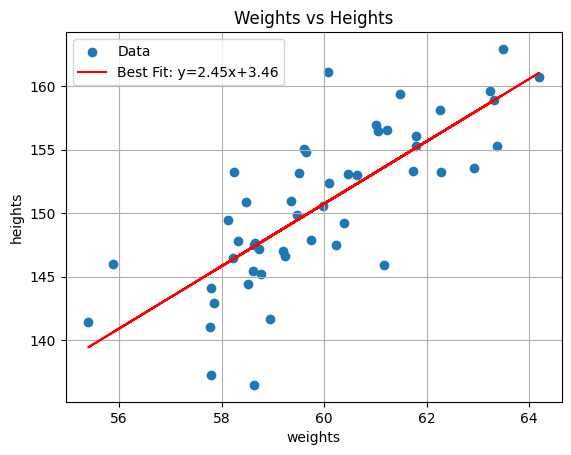

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Generate data
weights = np.random.normal(loc=60, scale=2, size=50)
heights = 2.5 * weights + np.random.normal(loc=0, scale=5, size=50)

# Compute best fit line (degree 1 polynomial)
slope, intercept = np.polyfit(weights, heights, 1)
line = slope * weights + intercept

# Plot
plt.figure()
plt.scatter(weights, heights, label='Data')
plt.plot(weights, line, color='red', label=f'Best Fit: y={slope:.2f}x+{intercept:.2f}')
plt.title("Weights vs Heights")
plt.xlabel("weights")
plt.ylabel("heights")
plt.grid(True)
plt.legend()
plt.show()


### Residual

How do we decide which line should be considered the 'best fit'? To understand this we first need to understand the residuals. When we fit a line, we can use that line to make predictions. So in the example above, we predict height but finding the height value that lies on the line for a given weight. However, notice that most points do not lie on the line, so our prediction will be slightly wrong. How wrong the prediction is is called the residual. 

Given a linear model:  
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon$

Given a data point:  
$(x_{1,0}, x_{2,0}, \dots, x_{p,0},\ y_0)$

Model prediction:  
$\hat{y}_0 = \beta_0 + \beta_1 x_{1,0} + \beta_2 x_{2,0} + \cdots + \beta_p x_{p,0}$

Residual:  
$r_0 = y_0 - \hat{y}_0$

Or, substituting the prediction:  
$r_0 = y_0 - \left( \beta_0 + \beta_1 x_{1,0} + \beta_2 x_{2,0} + \cdots + \beta_p x_{p,0} \right)$




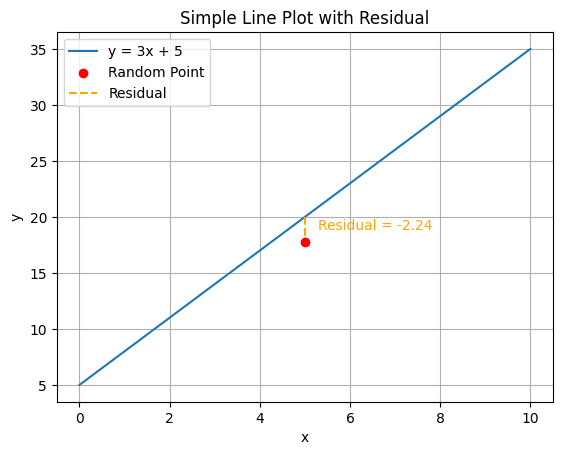

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Line data
x = np.linspace(0, 10, 100)
y = 3 * x + 5

# Random point
x_point = 5
y_rand = 3 * x_point + 5 + np.random.normal(scale=5)  # Add noise for realism
y_pred = 3 * x_point + 5
residual = y_rand - y_pred

# Plot
plt.figure()
plt.plot(x, y, label='y = 3x + 5')
plt.scatter(x_point, y_rand, color='red', zorder=5, label='Random Point')
plt.vlines(x_point, y_pred, y_rand, color='orange', linestyle='--', label='Residual')

# Annotate
plt.text(x_point + 0.3, (y_rand + y_pred) / 2,
         f"Residual = {residual:.2f}", color='orange')

plt.title("Simple Line Plot with Residual")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


### Least Squares Error

Now that we understand residuals we can define what the shape of best fit is. We choose the coefficients that minimise the sum of squared residuals.

$$
\text{Objective:} \quad \min_{\beta_0, \beta_1, \dots, \beta_p} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$$

Substituting the prediction $\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}$:

$$
= \min_{\beta_0, \beta_1, \dots, \beta_p} \sum_{i=1}^n \left( y_i - \left( \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} \right) \right)^2
$$


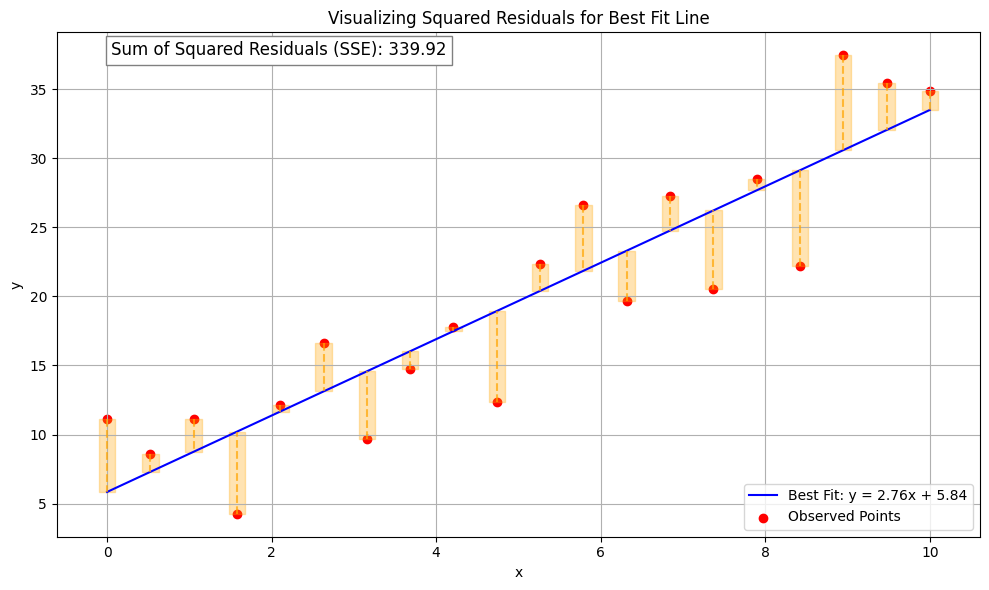

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Create reproducible data
x = np.linspace(0, 10, 20)
y_true = 3 * x + 5
noise = np.random.normal(scale=5, size=x.shape)
y_obs = y_true + noise

# Fit a linear model (least squares)
coeffs = np.polyfit(x, y_obs, 1)
y_fit = np.polyval(coeffs, x)

# Compute residuals
residuals = y_obs - y_fit
squared_residuals = residuals**2
sse = np.sum(squared_residuals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_fit, label=f'Best Fit: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}', color='blue')
plt.scatter(x, y_obs, color='red', label='Observed Points')

# Draw residuals and squares
for xi, yi_obs, yi_fit in zip(x, y_obs, y_fit):
    plt.vlines(xi, yi_obs, yi_fit, color='orange', linestyle='--', alpha=0.7)
    plt.fill_betweenx([yi_obs, yi_fit], xi - 0.1, xi + 0.1, color='orange', alpha=0.3)

# Add SSE annotation
plt.text(0.05, max(y_obs), f"Sum of Squared Residuals (SSE): {sse:.2f}",
         fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

plt.title("Visualizing Squared Residuals for Best Fit Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Assumptions

Linear models require the following assumptions to hold true:

1. Linearity  
The response variable is a linear combination of the predictors
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon$

2. Independence of Observations  
The observations $(x_i, y_i)$ are independent and identically distributed

3. Error Properties  
The error terms $\varepsilon_i$ are independent and identically normally distributed with mean 0 and constant variance $N(0, \sigma^2)$

4. No Perfect Multicollinearity  
The predictors are not perfectly linearly dependent. That is, no predictor is a perfect linear combination of the others

Note that the error term have constant variance is refered to as homoskedasticity with the converse refered to as heteroskedasticity. 